# Life expectancy and GDP

In [235]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('all_data.csv')
print(df.info())
print(df.describe())
print(df.Country.value_counts())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.75000

As per above statistics we can see that Life expectancy and GDP dataset has 4 different variables:
1. Country - categorical nominal variable having 6 different values
2. Year - year with the range between 2000-2015
3. Life expectancy at birth (years) - numerical continuous variable describing the expected average of people's life
4. GDP - numerical descrete value of gross domestic product

All the variables do not have missing data and has the proper datatypes assigned. All the data categorical variables (all countries) has the same number of observations.

C:\Users\aak98773\AppData\Local\Temp\ipykernel_5828\3961012024.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(countries,rotation=40,ha='right',rotation_mode='anchor')


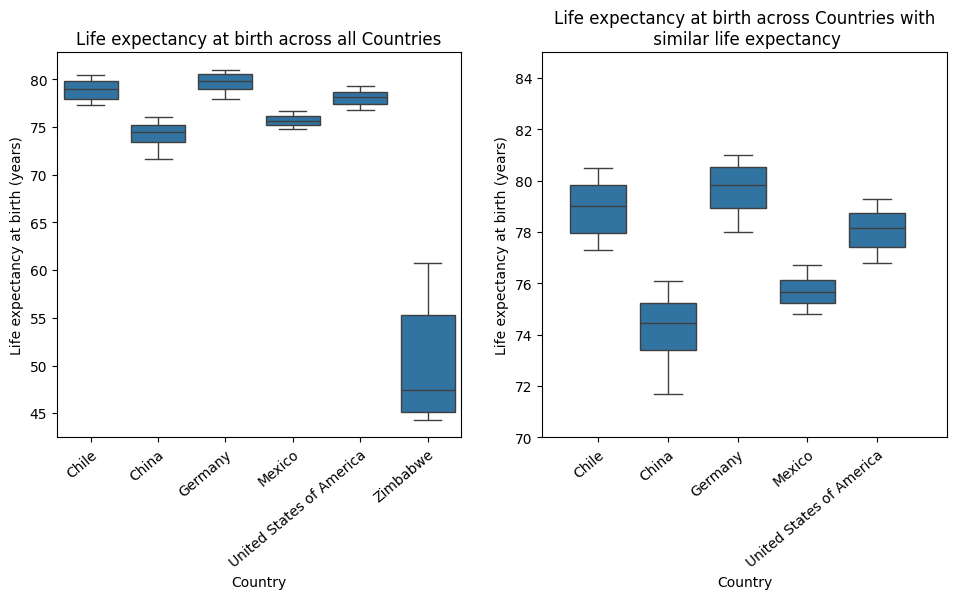

In [242]:

df["GDP_in_tn"] = df.GDP/1000000000000
countries = df.Country.unique()

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x=df.Country, y= df["Life expectancy at birth (years)"], data=df)
ax = plt.subplot(1,2,1)
plt.title("Life expectancy at birth across all Countries")
ax.set_xticks(range(len(countries)))
ax.set_xticklabels(countries,rotation=40,ha='right',rotation_mode='anchor')

plt.subplot(1,2,2)
sns.boxplot(x=df.Country[df.Country != 'Zimbabwe'], y= df["Life expectancy at birth (years)"][df.Country != 'Zimbabwe'], data=df)
ax = plt.subplot(1,2,2)
plt.title("Life expectancy at birth across Countries with\n similar life expectancy")
plt.axis([-0.8,5,70,85])
ax.set_xticklabels(countries,rotation=40,ha='right',rotation_mode='anchor')
plt.subplots_adjust(left=0.01)
plt.show()
plt.close()

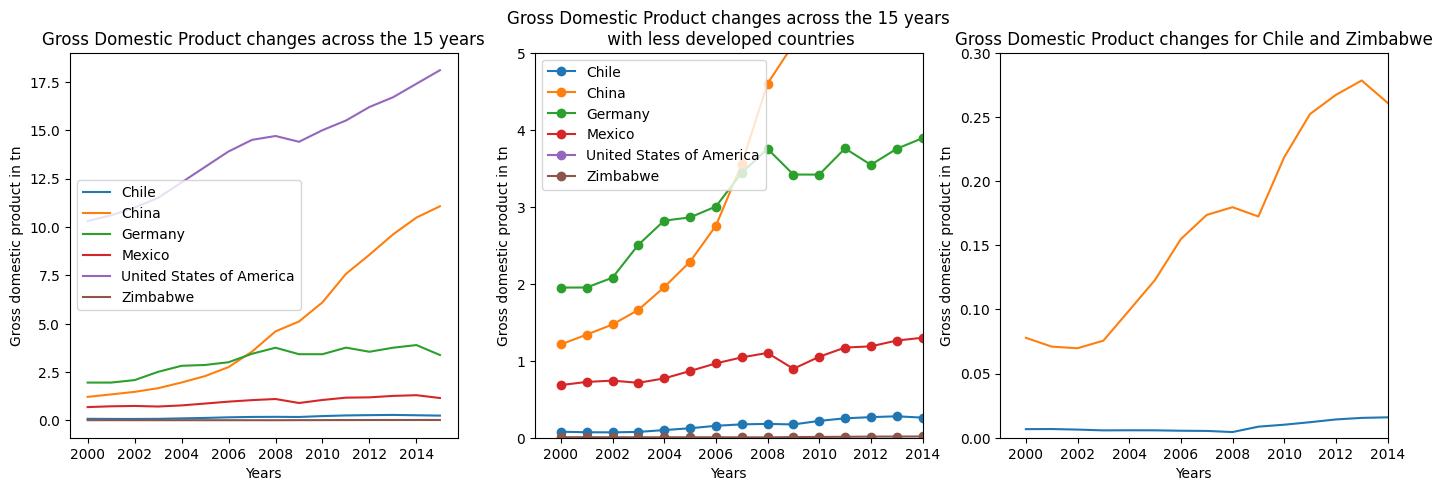

In [234]:
plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
for i in countries:
    plt.plot(df.Year[df.Country==i], df["GDP_in_tn"][df.Country==i])
plt.legend(countries)
plt.xlabel('Years')
plt.ylabel('Gross domestic product in tn')
plt.title('Gross Domestic Product changes across the 15 years')

plt.subplot(1,3,2)
for i in countries:
    plt.plot(df.Year[df.Country == i], df["GDP_in_tn"][df.Country==i],marker='o')
ax = plt.subplot(1,3,2)
plt.legend(countries)
plt.xlabel('Years')
plt.ylabel('Gross domestic product in tn')
plt.title('Gross Domestic Product changes across the 15 years\n with less developed countries')
plt.axis([1999,2014,0,5])

plt.subplot(1,3,3)
ax = plt.subplot(1,3,3)
plt.plot(df.Year[df.Country =="Zimbabwe"],df["GDP_in_tn"][df.Country == 'Zimbabwe'])
plt.plot(df.Year[df.Country =="Chile"],df["GDP_in_tn"][df.Country =="Chile"])
plt.xlabel('Years')
plt.ylabel('Gross domestic product in tn')
plt.title('Gross Domestic Product changes for Chile and Zimbabwe')
plt.axis([1999,2014,0,0.3])


plt.show()
plt.close()

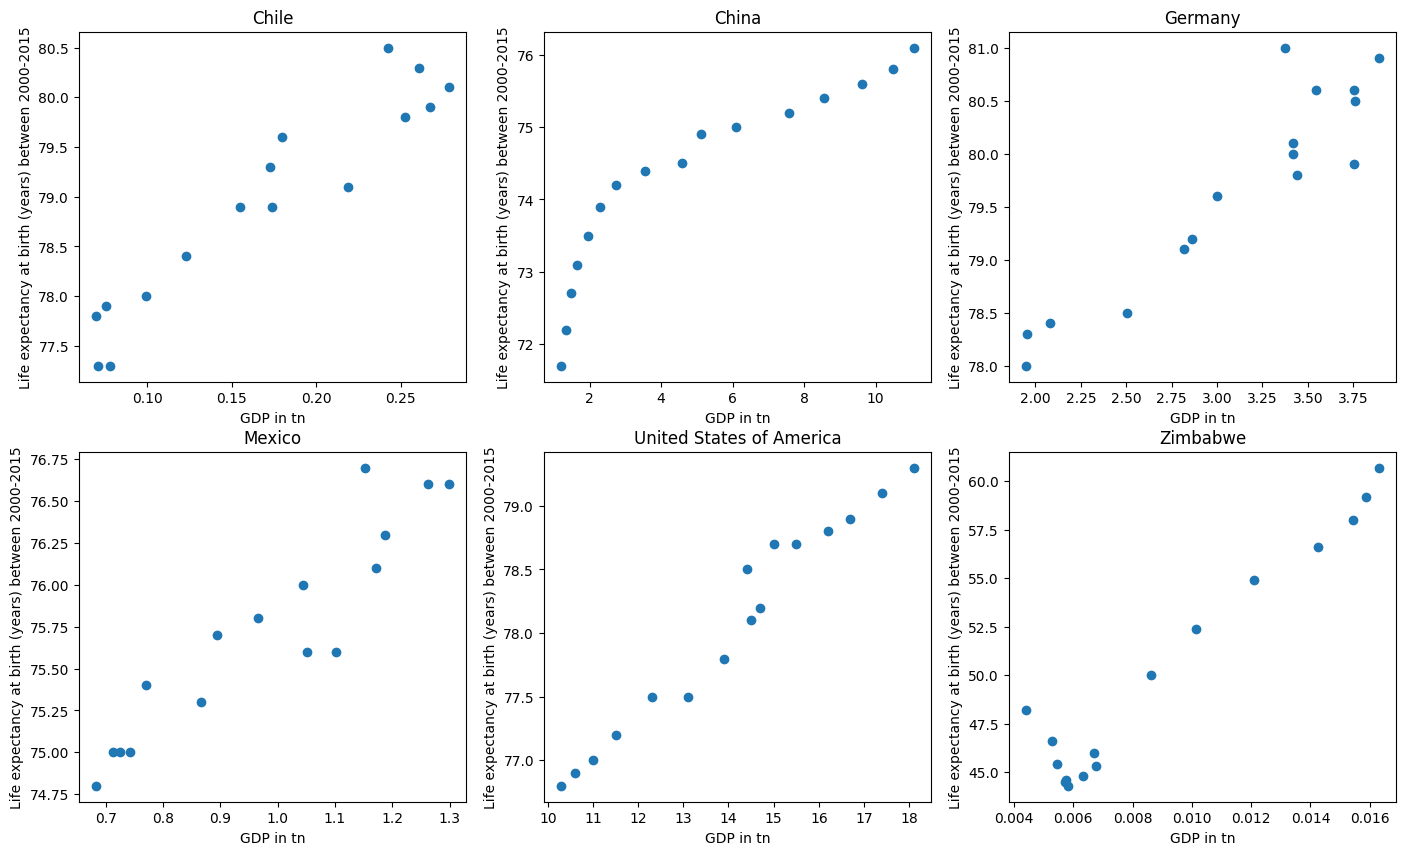

In [253]:
plt.figure(figsize=(17,10))
plt.subplot(2,3,1)
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.scatter(df.GDP_in_tn[df.Country == countries[i-1]],df["Life expectancy at birth (years)"][df.Country == countries[i-1]])
    plt.title(countries[i-1])
    plt.ylabel("Life expectancy at birth (years) between 2000-2015")
    plt.xlabel("GDP in tn")
plt.show()
